In [2]:
import numpy as np
import json
import pandas as pd


from matrix_class import ProteinMatrix
from matrix_class import SubMatrix
from cluster_class import AllClusters
from degreelist_class import DegreeList


from connected_components_utils import *
from analysis_utils import *

from func_e.FUNC_E import FUNC_E # import the class
import func_e.vocabs.all as vocabs

In [3]:
    matrix, clusters, degreelist = initialize_matrix_clusters_degreelist("../data/networks/DREAM_files/dream_3.txt", "../data/results/DREAM-3-cc/d3_5_100.json-cluster.json")
    
    qualifying_clusters, qualifying_proteins = find_clusters_and_proteins_together(matrix, clusters, degreelist, cluster_ratio=pick_ratio(clusters.get_num_clusters()), protein_ratio=.05, protein_constant=2)


    genomic_background_filepath = '../data/testing_data/protein_list.txt'
    termlist = vocabs.getTerms(['GO'])
    term_mapping_filepath = 'term_mapping.txt'
    create_term_mapping_list('../data/go-results/dream_3_go_results.tsv', term_mapping_filepath)



    og_clusters_querylist_path = 'original_querylist.txt'
    clusters.print_querylist_of_clusters_to_file(qualifying_clusters, og_clusters_querylist_path)



    original_fe = FUNC_E()
    original_fe.importFiles({
        'background': genomic_background_filepath, 
        'query': og_clusters_querylist_path, 
        'terms2features': term_mapping_filepath })
    original_fe.setTerms(termlist)
    original_fe.setEnrichmentSettings({'ecut': 0.01})
    original_fe.run(cluster=False)



    update_clusters(clusters, qualifying_proteins)


    updated_clusters_querylist_path = 'new_querylist.txt'
    clusters.print_querylist_of_clusters_to_file(qualifying_clusters, updated_clusters_querylist_path)

    updated_fe = FUNC_E()
    updated_fe.importFiles({
        'background': genomic_background_filepath, 
        'query': updated_clusters_querylist_path, 
        'terms2features': term_mapping_filepath })
    updated_fe.setTerms(termlist)
    updated_fe.setEnrichmentSettings({'ecut': 0.01})
    updated_fe.run(cluster=False)
    
    # print(f"ORIGINAL CLUSTERS TABLE:\n{original_fe.enrichment.sort_values('Fishers_pvalue')}")
    # print(f"UPDATED CLUSTERS TABLE:\n{updated_fe.enrichment.sort_values('Fishers_pvalue')}")




/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  modResults = modResults.append({
/Users/charlotte/miniconda3/envs/diamonds/lib/python3.10/site-packages/func_e/FUNC_E.py:279: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [23]:
original_df = original_fe.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()
original_df['Module'] = original_df['Module'] + ' ' + original_df['Term']
original_df.drop('Term', axis=1, inplace=True)


In [24]:

updated_df = updated_fe.enrichment[['Module', 'Term', 'Fishers_pvalue']].copy()

updated_df['Module'] = updated_df['Module'] + ' ' + updated_df['Term']
updated_df.drop('Term', axis=1, inplace=True)
updated_df.rename(columns = {'Fishers_pvalue':'Updated_Fishers_pvalue'}, inplace = True)



In [26]:
print(f"ORIGINAL CLUSTERS TABLE:\n{original_df}")
print(f"UPDATED CLUSTERS TABLE:\n{updated_df}")

ORIGINAL CLUSTERS TABLE:
                    Module Fishers_pvalue
0   cluster_161 GO:0030175       0.002023
1   cluster_161 GO:0032465       0.007341
2   cluster_164 GO:0005741       0.007455
3   cluster_164 GO:0043276       0.008671
4   cluster_164 GO:0045453       0.000438
5   cluster_164 GO:0060444       0.008671
6   cluster_174 GO:0050679       0.005841
7   cluster_185 GO:0016241       0.007339
8   cluster_185 GO:0016485       0.005832
9   cluster_185 GO:0030216       0.004486
10  cluster_185 GO:0055038       0.007339
11  cluster_185 GO:0070507       0.002297
12  cluster_185 GO:0072659       0.001876
13   cluster_25 GO:0007346       0.007487
14   cluster_25 GO:0032728       0.005714
15   cluster_25 GO:0035666       0.007487
16   cluster_29 GO:0001656       0.002948
17   cluster_29 GO:0008630       0.003013
18   cluster_29 GO:0048536        0.00033
19   cluster_29 GO:0071897       0.002948
20   cluster_30 GO:0007223       0.004462
21   cluster_30 GO:0030136       0.003596
22   clus

In [32]:
results_df = pd.merge(original_df, updated_df, on=['Module'], how='outer')

In [33]:
print(results_df)

                    Module Fishers_pvalue Updated_Fishers_pvalue
0   cluster_161 GO:0030175       0.002023               0.002202
1   cluster_161 GO:0032465       0.007341               0.007827
2   cluster_164 GO:0005741       0.007455               0.003026
3   cluster_164 GO:0043276       0.008671                    NaN
4   cluster_164 GO:0045453       0.000438               0.000849
..                     ...            ...                    ...
60   cluster_49 GO:0038128            NaN               0.006028
61   cluster_49 GO:0043406            NaN               0.005061
62   cluster_73 GO:0007268            NaN               0.009189
63   cluster_73 GO:0018105            NaN                0.00569
64   cluster_73 GO:0046827            NaN                0.00736

[65 rows x 3 columns]


In [35]:
results_df.to_csv("results.txt", sep='\t')


In [38]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Module'>

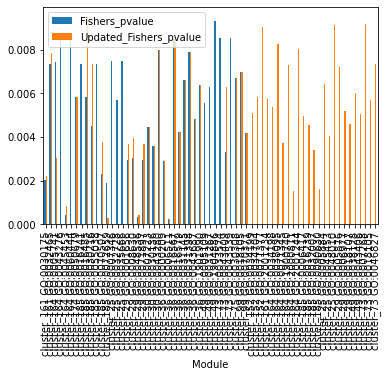

In [39]:
results_df.plot(x="Module", y=["Fishers_pvalue", "Updated_Fishers_pvalue"], kind="bar")